Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 52 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     57.993  0.782    56.441     59.542      0.011    0.008    5073.0   
sigma   2.331  0.682     1.294      3.663      0.011    0.008    4461.0   

       ess_tail  r_hat  
mu       4220.0    1.0  
sigma    4514.0    1.0  


array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

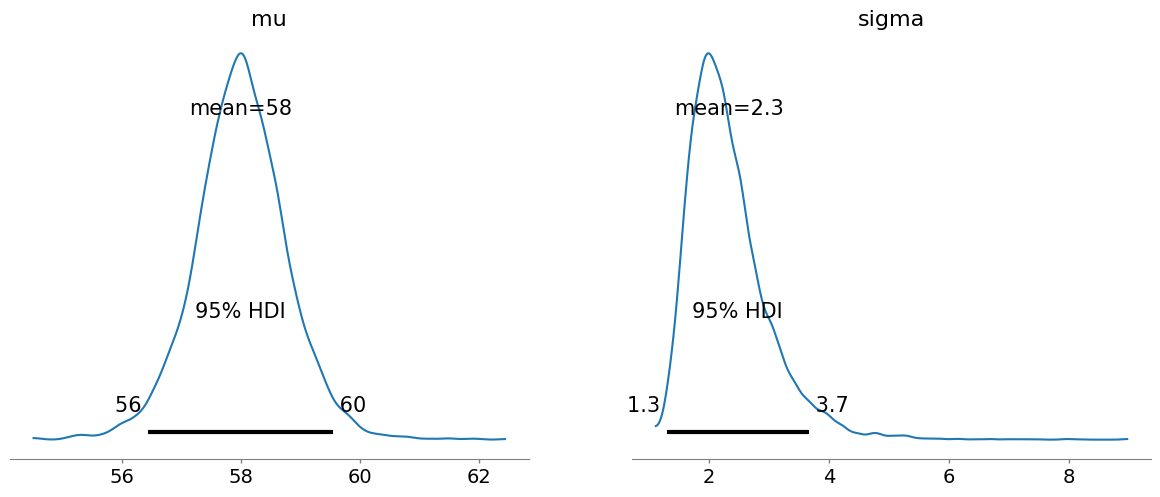

In [4]:
import numpy as np
import pymc as pm
import arviz as az

z = [56, 60, 58, 55, 57, 59, 61, 56, 58, 60]
z = np.array(z)

x = z.mean()

with pm.Model() as model:
    mu = pm.Normal('mu', mu = x, sigma = 100)

    sigma = pm.HalfNormal('sigma', sigma = 10)

    y = pm.Normal('y', mu = mu, sigma = sigma, observed=z)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

summary = az.summary(trace, hdi_prob=0.95)
print(summary)

az.plot_posterior(trace, hdi_prob=0.95)
